In [487]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error

from sklearn.tree import export_graphviz
from IPython.display import Image
import plotly.figure_factory as ff
from sklearn import tree

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [488]:
# Cochise county model
coconino = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/coconino.csv")

In [489]:
coconino['flagstaff_hmi'] = pd.cut(coconino.flagstaff_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])
coconino['flagstaff_hmi'] = coconino['flagstaff_hmi'].astype(int)
coconino

,date,flagstaff_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,10434,6660.4,116717,15.0,7303000
1,2001,0,11375,6848.8,117803,15.0,8545000
2,2002,0,11638,7717.6,120390,15.0,11246000
3,2003,1,12876,7502.3,121545,15.0,11981000
4,2004,1,14102,6702.4,123349,16.0,8545000
5,2005,1,12666,6972.5,124804,18.0,8545000
6,2006,1,13067,6586.8,126029,16.8,11981000
7,2007,1,11691,6099.8,127451,16.2,14844000
8,2008,1,12442,5838.6,128426,16.0,12448000
9,2009,1,10494,5183.9,129849,18.0,14844000


In [490]:
# Get X and y
X = coconino.drop('flagstaff_hmi', axis = 1)
Y = coconino['flagstaff_hmi']

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2)

In [491]:
# create the classifier
rf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf.fit(X_train, y_train)

# predictin on the test set
y_pred = rf.predict(X_test)

# Calculate Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


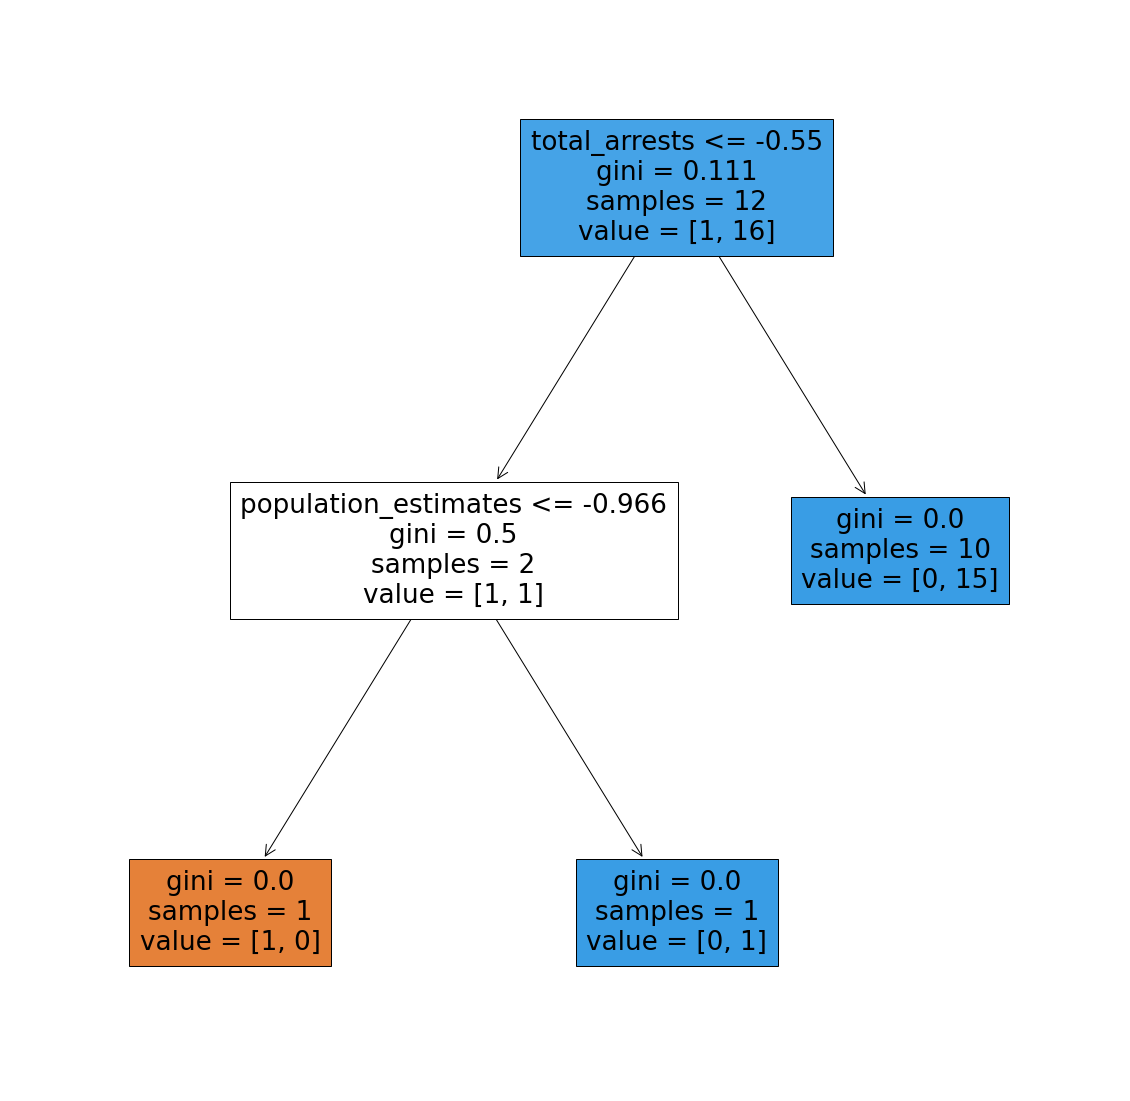

In [492]:
plt.figure(figsize = (20, 20))
_ = tree.plot_tree(rf.estimators_[0], feature_names = X.columns, filled = True)

In [493]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.2
Root Mean Squared Error: 0.4472135954999579


In [550]:
# Gila county model
gila = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/gila.csv")

In [551]:
gila['payson_hmi'] = pd.cut(gila.payson_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])
gila['payson_hmi'] = gila['payson_hmi'].astype(int)
gila

,date,payson_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,3840,4443.4,51355,17.0,14919000
1,2001,0,5406,4280.4,51165,17.0,18905000
2,2002,0,4492,4564.5,51225,17.0,23779000
3,2003,0,3845,4347.7,50906,17.0,25343000
4,2004,0,4074,4266.2,50848,18.0,27391000
5,2005,0,4205,4368.8,50914,19.0,22202000
6,2006,0,4174,4023.3,51635,20.0,27391000
7,2007,0,3849,3216.0,52231,18.2,24820000
8,2008,0,4565,3603.5,52273,16.0,18905000
9,2009,0,4519,5604.3,52199,20.7,27391000


In [566]:
# Get X and y
X = gila.drop('payson_hmi', axis = 1)
Y = gila['payson_hmi']

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2)

In [575]:
# create the classifier
rf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf.fit(X_train, y_train)

# predictin on the test set
y_pred = rf.predict(X_test)

# Calculate Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


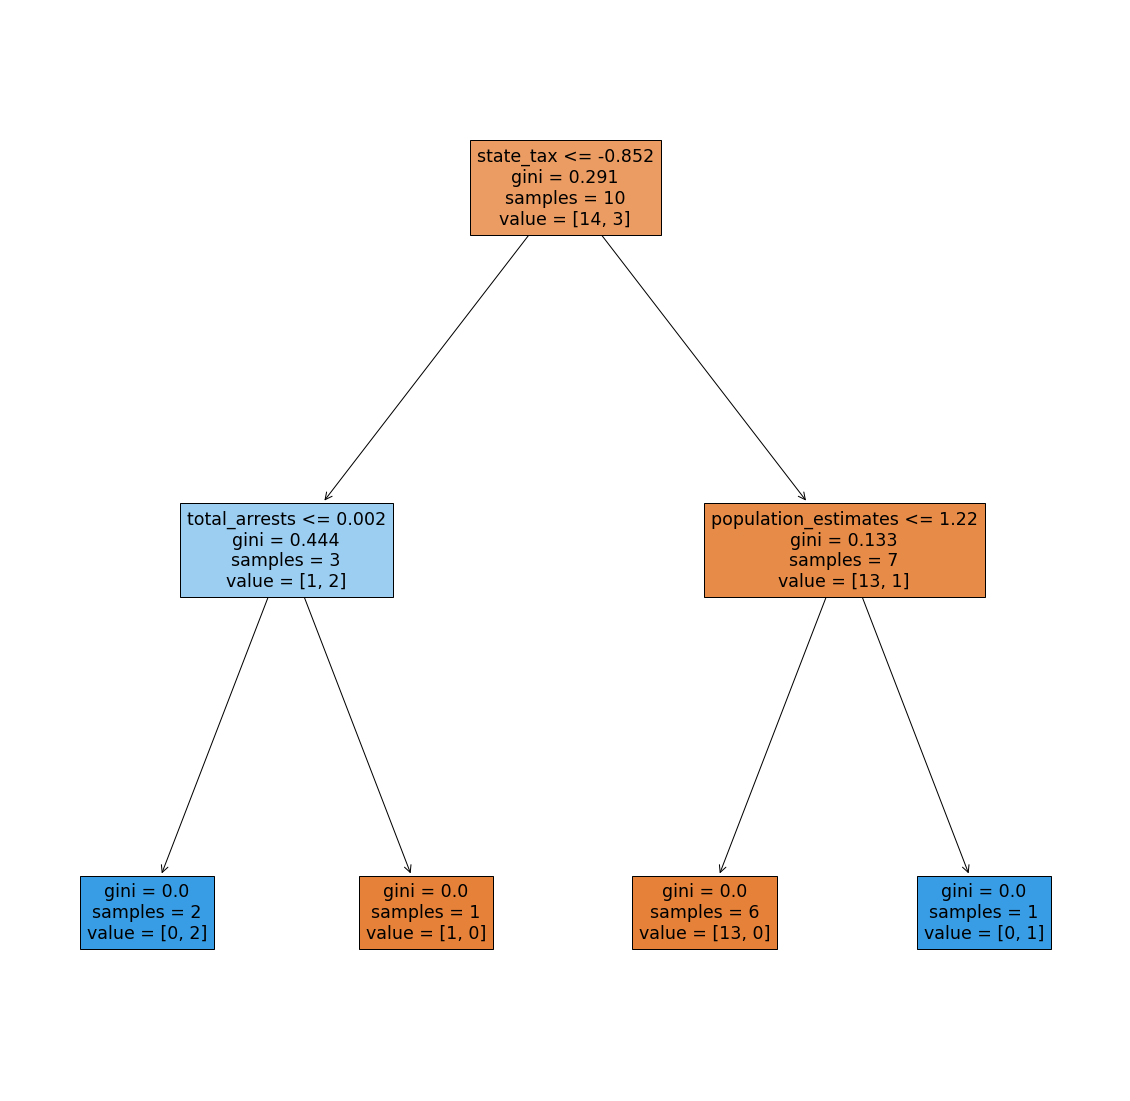

In [576]:
plt.figure(figsize = (20, 20))
_ = tree.plot_tree(rf.estimators_[0], feature_names = X.columns, filled = True)

In [577]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [530]:
# Graham county model
graham = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/graham.csv")

In [531]:
graham['safford_hmi'] = pd.cut(graham.safford_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])
graham['safford_hmi'] = graham['safford_hmi'].astype(int)
graham

,date,safford_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,1563,2445.6,33541,21.0,4396000
1,2001,0,1461,2421.9,33307,22.0,2596000
2,2002,0,1378,2428.7,33120,22.0,4792000
3,2003,0,1354,2537.2,32785,20.0,2415000
4,2004,0,1286,2134.3,32441,22.0,3691000
5,2005,0,670,1146.1,32629,23.0,4396000
6,2006,0,757,2096.9,33286,23.4,3707000
7,2007,0,850,1588.2,34736,22.4,4835000
8,2008,0,1180,2136.9,36204,21.0,2415000
9,2009,0,1369,4777.7,37045,21.5,2596000


In [546]:
# Get X and y
X = graham.drop('safford_hmi', axis = 1)
Y = graham['safford_hmi']

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2)

In [547]:
# create the classifier
rf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf.fit(X_train, y_train)

# predictin on the test set
y_pred = rf.predict(X_test)

# Calculate Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


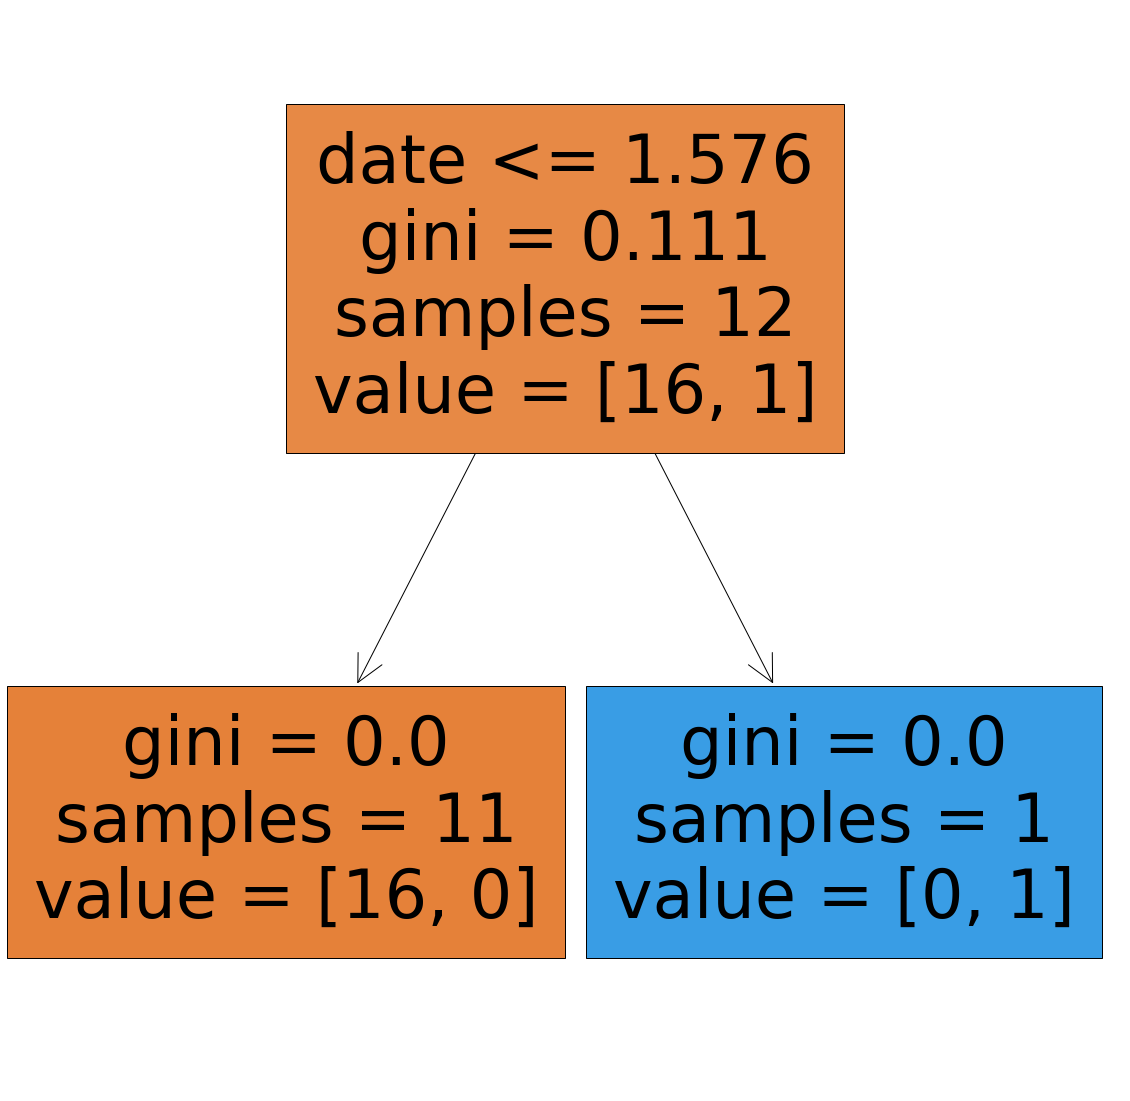

In [548]:
plt.figure(figsize = (20, 20))
_ = tree.plot_tree(rf.estimators_[0], feature_names = X.columns, filled = True)

In [549]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [506]:
# Maricopa county model
maricopa = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/maricopa.csv")

In [507]:
maricopa['phoenix_hmi'] = pd.cut(maricopa.phoenix_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])
maricopa['phoenix_hmi'] = maricopa['phoenix_hmi'].astype(int)
maricopa

,date,phoenix_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,155480,6167.4,3097378,10.0,384937000
1,2001,0,149496,6183.1,3200075,11.0,528421000
2,2002,0,156126,6402.9,3299127,11.0,442961000
3,2003,0,158182,5867.1,3391391,12.0,475144000
4,2004,0,160559,5507.9,3502635,13.0,528421000
5,2005,1,147950,5080.8,3647131,12.0,554877000
6,2006,1,160996,5098.1,3776118,12.5,604492000
7,2007,1,174332,5079.7,3872962,12.9,554877000
8,2008,1,184138,5004.7,3958263,13.0,510299000
9,2009,0,187775,4457.8,4023132,15.1,564781000


In [508]:
# Get X and y
X = maricopa.drop('phoenix_hmi', axis = 1)
Y = maricopa['phoenix_hmi']

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2)

In [509]:
# create the classifier
rf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf.fit(X_train, y_train)

# predictin on the test set
y_pred = rf.predict(X_test)

# Calculate Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


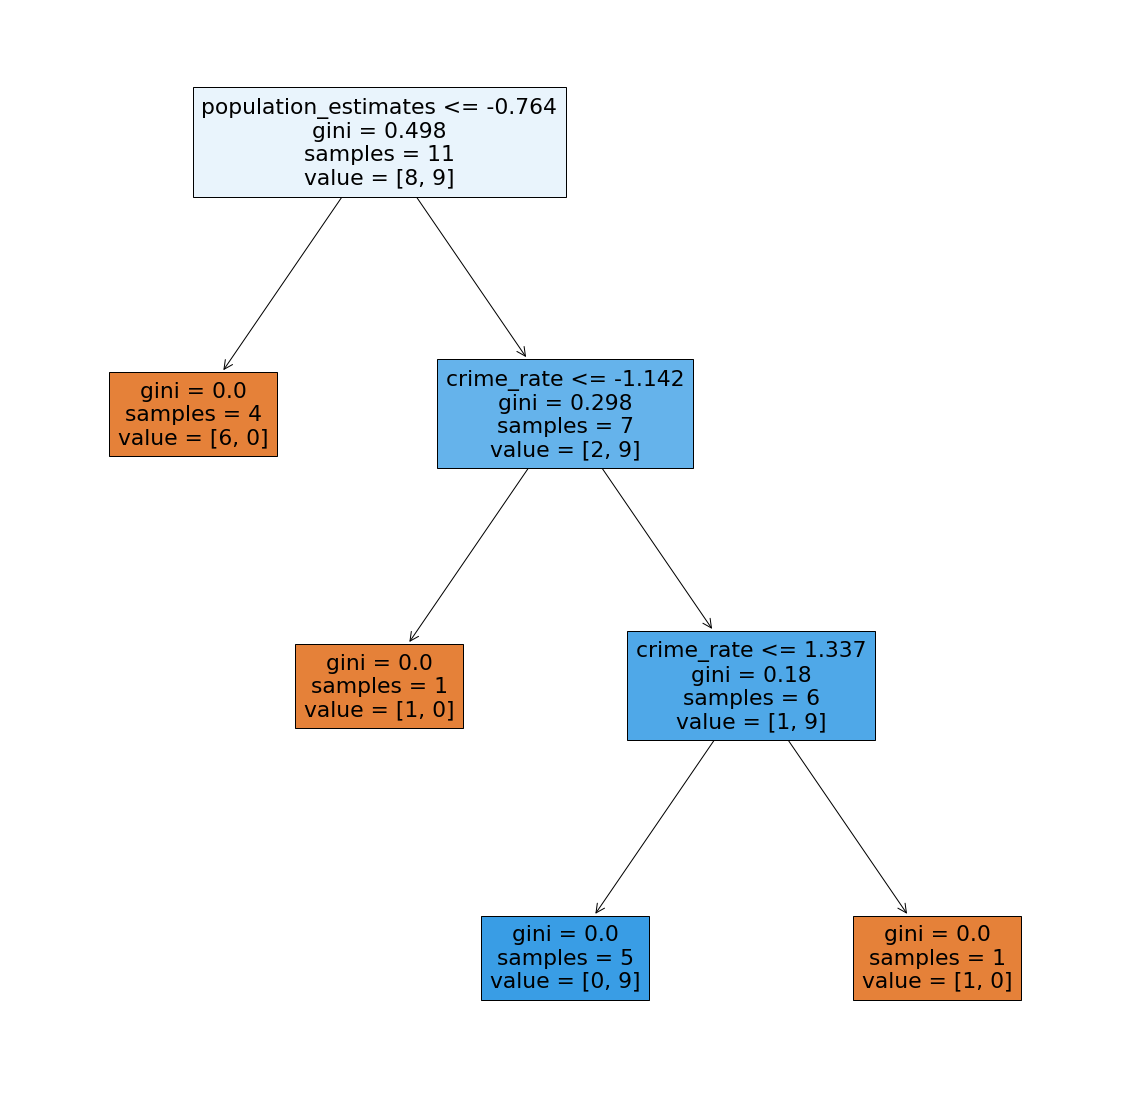

In [510]:
plt.figure(figsize = (20, 20))
_ = tree.plot_tree(rf.estimators_[0], feature_names = X.columns, filled = True)

In [511]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [512]:
# Mohave county model
mohave = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/mohave.csv")

In [513]:
mohave['lake_havasu_city_hmi'] = pd.cut(mohave.lake_havasu_city_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])
mohave['lake_havasu_city_hmi'] = mohave['lake_havasu_city_hmi'].astype(int)
mohave

,date,lake_havasu_city_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,11459,4936.4,156194,15.0,26588000
1,2001,0,11212,5221.6,159840,16.0,29325000
2,2002,0,11910,5489.4,165177,15.0,27522000
3,2003,0,13953,6344.7,171019,14.0,29325000
4,2004,0,15840,6308.2,178313,15.0,32768000
5,2005,1,16608,6145.2,185940,15.0,43663000
6,2006,1,17255,5580.1,192724,16.0,49790000
7,2007,1,16705,5384.3,195852,13.5,54301000
8,2008,1,15808,4336.3,195601,17.0,51325000
9,2009,0,15855,3984.7,194825,17.8,59585000


In [514]:
# Get X and y
X = mohave.drop('lake_havasu_city_hmi', axis = 1)
Y = mohave['lake_havasu_city_hmi']

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2)

In [515]:
# create the classifier
rf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf.fit(X_train, y_train)

# predictin on the test set
y_pred = rf.predict(X_test)

# Calculate Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


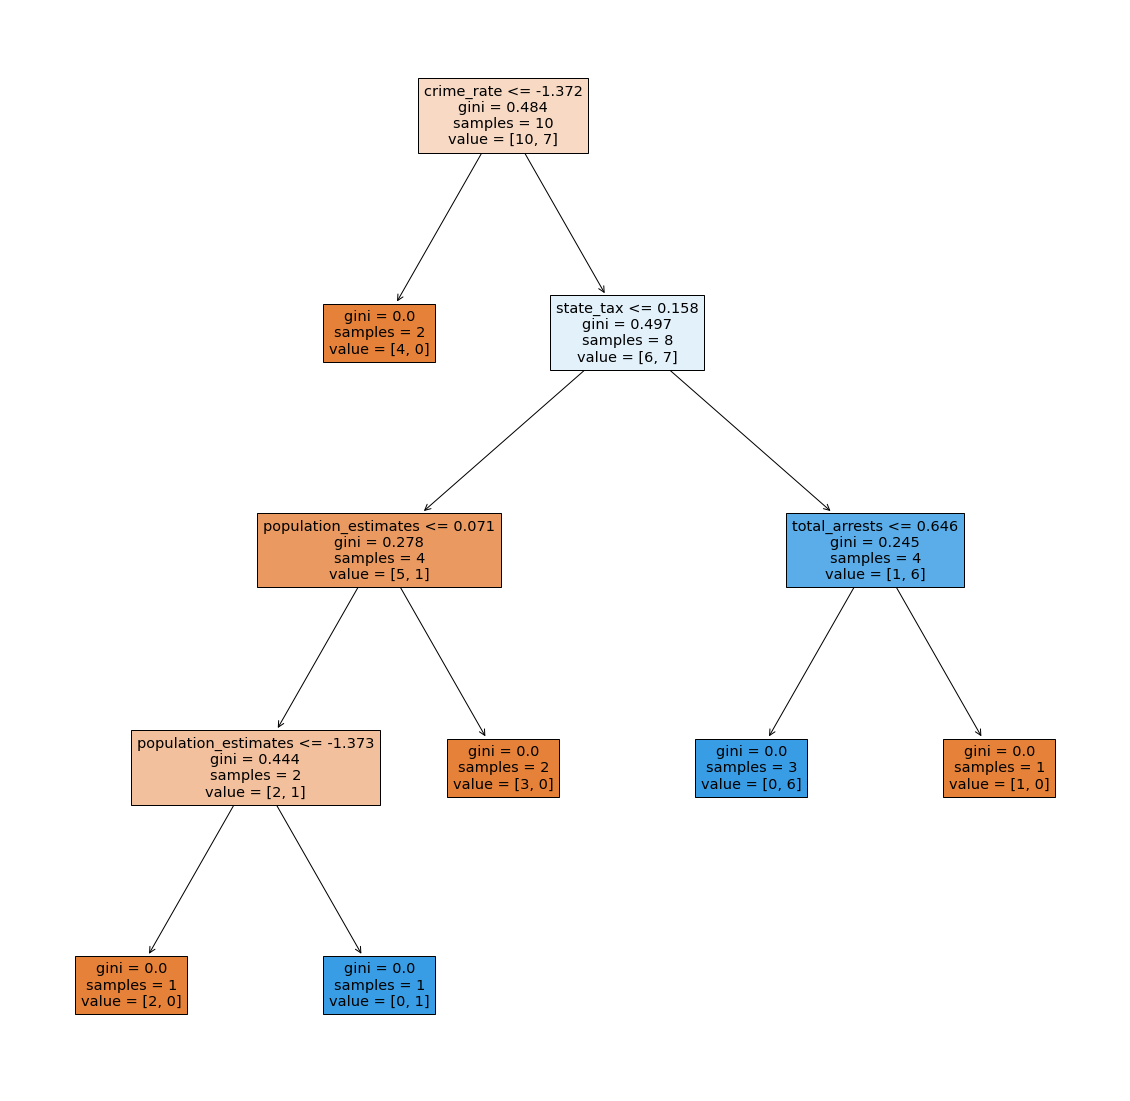

In [516]:
plt.figure(figsize = (20, 20))
_ = tree.plot_tree(rf.estimators_[0], feature_names = X.columns, filled = True)

In [517]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [524]:
# Navajo county model
navajo = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/navajo.csv")

In [525]:
navajo['show_low_hmi'] = pd.cut(navajo.show_low_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])
navajo['show_low_hmi'] = navajo['show_low_hmi'].astype(int)
navajo

,date,show_low_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,5893,3433.9,97876,24.0,4246000
1,2001,0,6019,3403.9,98549,24.0,12543000
2,2002,0,6116,3436.2,101358,24.0,13005000
3,2003,0,6021,3797.0,103220,21.0,12294000
4,2004,0,6609,3378.5,105020,23.0,17950000
5,2005,0,6365,3344.9,106968,28.0,12132000
6,2006,0,6612,2926.0,109000,24.4,17950000
7,2007,0,6890,2866.7,110999,23.4,12613000
8,2008,0,7490,3085.9,112348,23.0,17950000
9,2009,0,6771,3053.0,112975,27.4,10935000


In [526]:
# Get X and y
X = navajo.drop('show_low_hmi', axis = 1)
Y = navajo['show_low_hmi']

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2)

In [527]:
# create the classifier
rf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf.fit(X_train, y_train)

# predictin on the test set
y_pred = rf.predict(X_test)

# Calculate Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


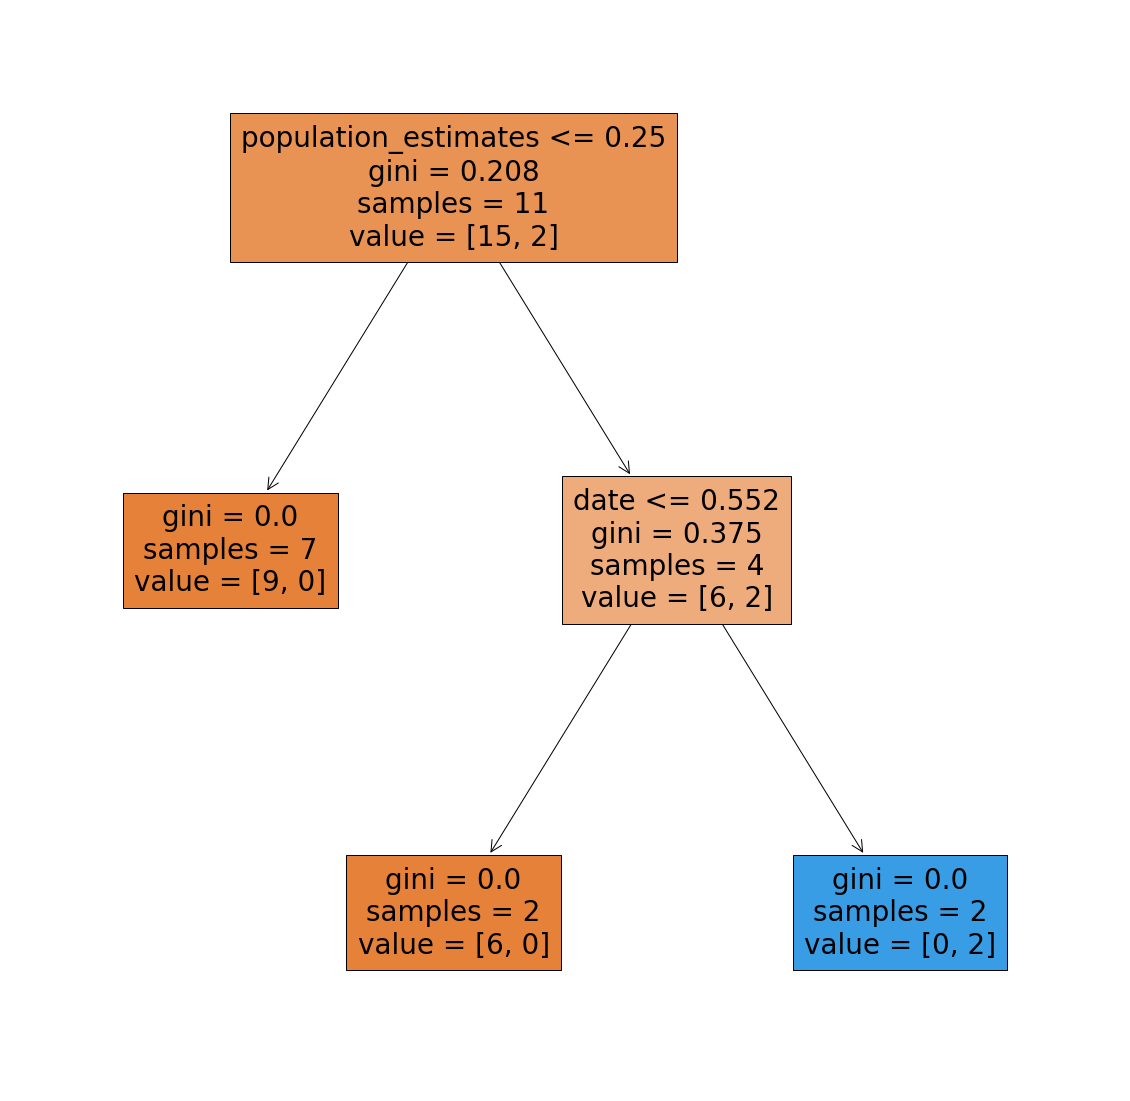

In [528]:
plt.figure(figsize = (20, 20))
_ = tree.plot_tree(rf.estimators_[0], feature_names = X.columns, filled = True)

In [529]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.2
Root Mean Squared Error: 0.4472135954999579


In [438]:
# Pima county model
pima = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/pima.csv")

In [439]:
pima['tucson_hmi'] = pd.cut(pima.tucson_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])
pima['tucson_hmi'] = pima['tucson_hmi'].astype(int)
pima

,date,tucson_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,64739,7628.0,848521,13.0,237006000
1,2001,0,67030,8131.8,865694,13.0,300972000
2,2002,0,70134,8218.9,886063,14.0,244806000
3,2003,0,70399,8330.8,903320,14.0,258376000
4,2004,0,70070,8280.0,924205,15.0,279527000
5,2005,1,68340,6565.8,948965,14.0,300972000
6,2006,1,64130,4318.4,975476,15.3,321475000
7,2007,1,68849,4101.5,996593,14.9,423443000
8,2008,1,68105,3949.6,1009832,15.0,381861000
9,2009,0,68679,3843.9,1020200,18.9,396239000


In [440]:
# Get X and y
X = pima.drop('tucson_hmi', axis = 1)
Y = pima['tucson_hmi']

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2)

In [441]:
# create the classifier
rf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf.fit(X_train, y_train)

# predictin on the test set
y_pred = rf.predict(X_test)

# Calculate Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


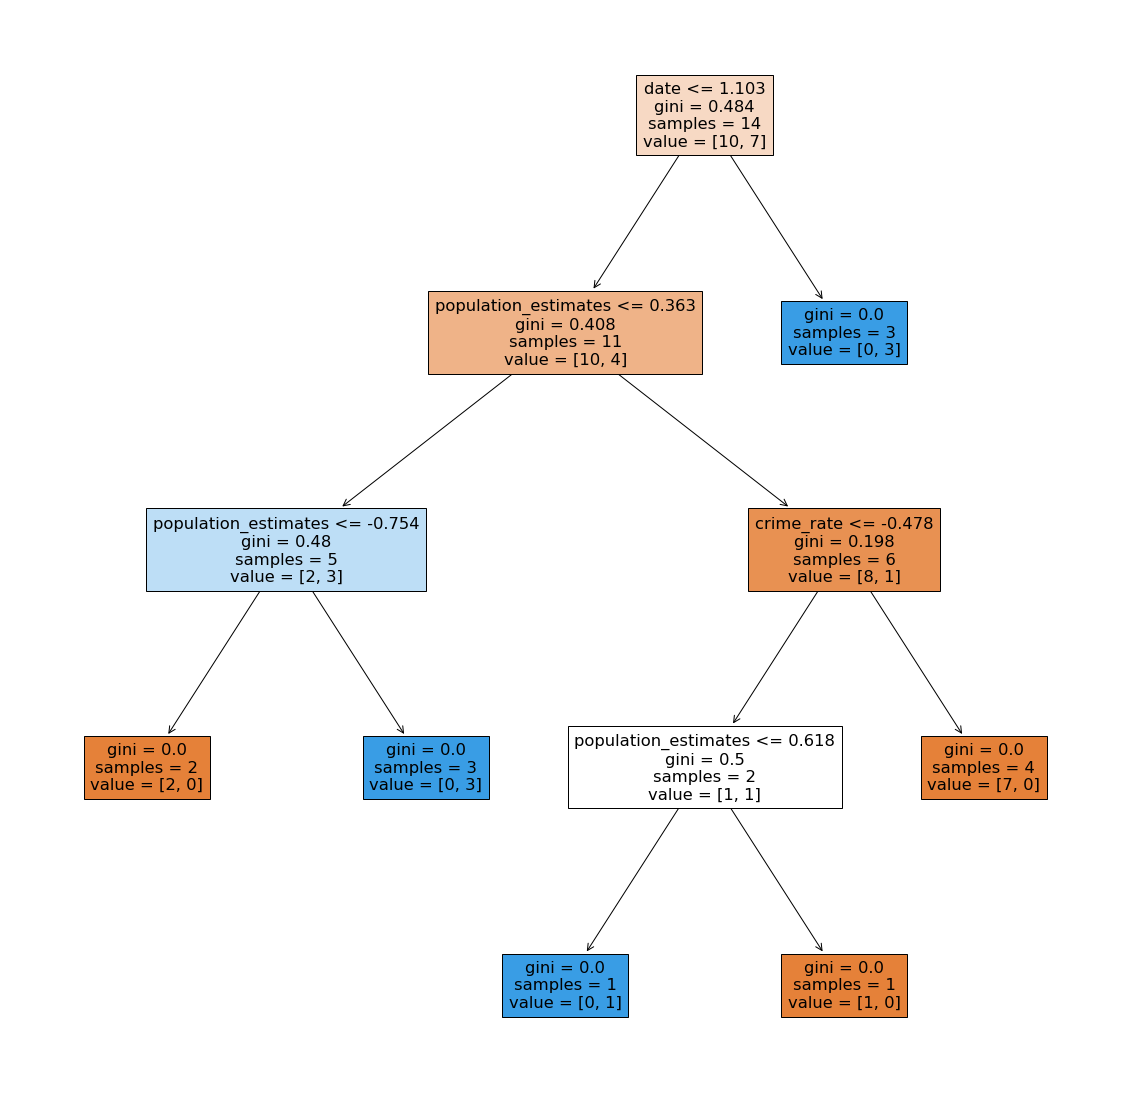

In [442]:
plt.figure(figsize = (20, 20))
_ = tree.plot_tree(rf.estimators_[0], feature_names = X.columns, filled = True)

In [443]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [444]:
# Yavapai county model
yavapai = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/yavapai.csv")

In [445]:
yavapai['prescott_hmi'] = pd.cut(yavapai.prescott_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])
yavapai['prescott_hmi'] = yavapai['prescott_hmi'].astype(int)
yavapai

,date,prescott_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,6746,4790.6,168886,12.0,28921000
1,2001,0,11993,4649.8,173285,13.0,28921000
2,2002,0,11478,4587.3,178390,12.0,32497000
3,2003,0,11082,4407.5,183400,12.0,36446000
4,2004,0,12031,4274.2,189532,12.0,41321000
5,2005,1,12769,3985.0,197533,12.0,45088000
6,2006,1,12927,3491.2,206672,12.4,50351000
7,2007,1,12856,3321.6,212004,12.6,56254000
8,2008,1,11863,3077.8,214930,13.0,45642000
9,2009,1,11908,2912.6,215686,14.2,50382000


In [446]:
# Get X and y
X = pima.drop('tucson_hmi', axis = 1)
Y = pima['tucson_hmi']

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2)

In [447]:
# create the classifier
rf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf.fit(X_train, y_train)

# predictin on the test set
y_pred = rf.predict(X_test)

# Calculate Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


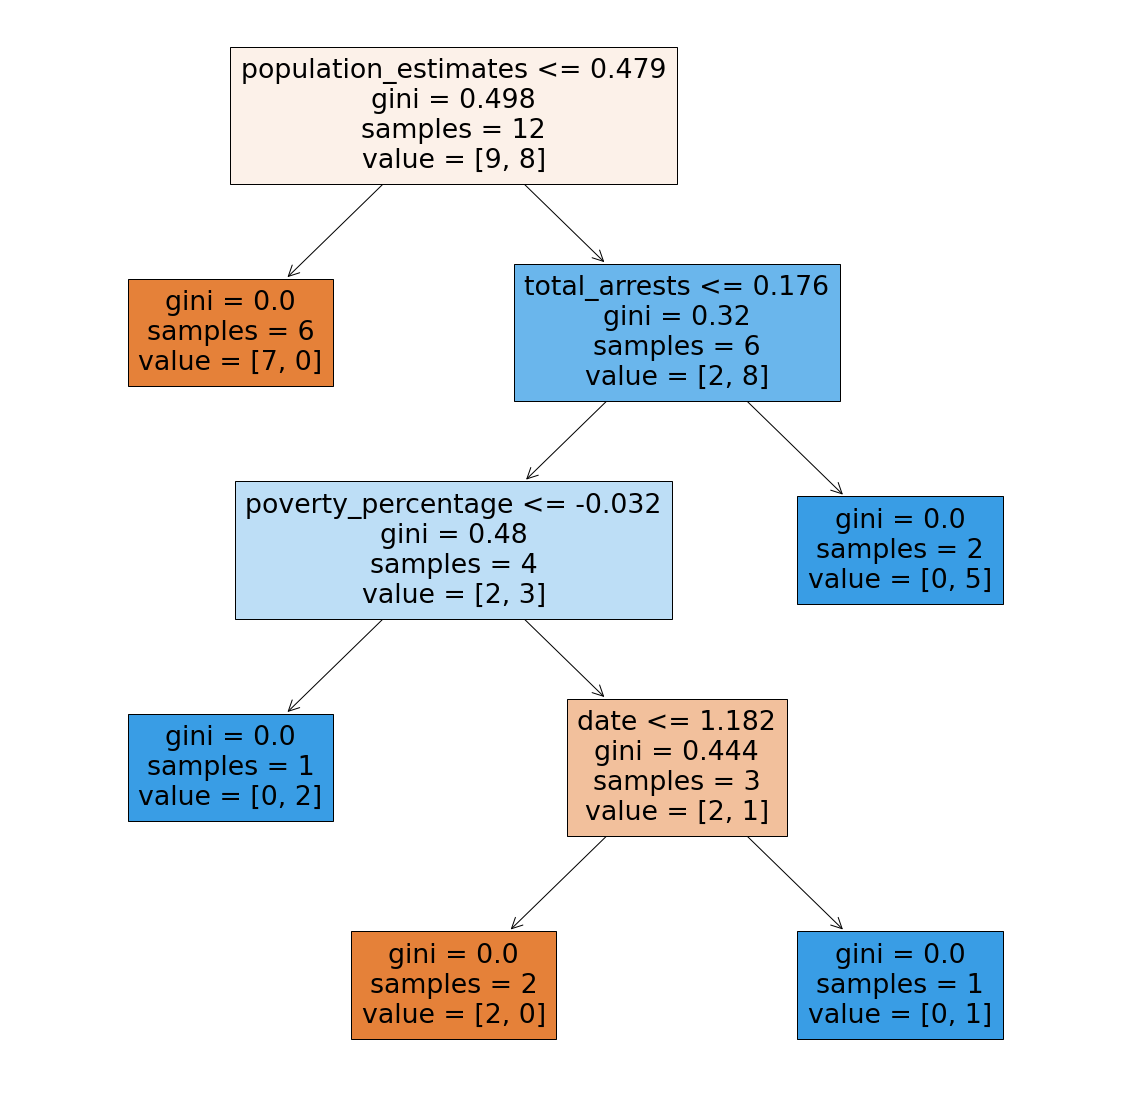

In [448]:
plt.figure(figsize = (20, 20))
_ = tree.plot_tree(rf.estimators_[0], feature_names = X.columns, filled = True)

In [449]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.2
Root Mean Squared Error: 0.4472135954999579
